<a href="https://colab.research.google.com/github/TriDuks/AIDeepLearning/blob/main/Classification%20of%20Vehicle%20using%20Deep%20Learning%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Datasets: https://drive.google.com/drive/folders/1Q6bL80OTBk8W51HBF7H1cMoED-8G1WK8?usp=share_link

In [24]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array

# **Processing**

In [10]:
#Preprocessing để Training 
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh, chia dữ liệu và định dạng ảnh về binary
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   rotation_range = 20,         #Tăng cường dữ liệu 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,                                 
                                  )
#train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/1_FINAL/Training', 
                                                 target_size = (128,128), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 824 images belonging to 7 classes.


In [26]:
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2,
                                  rotation_range = 20,         #Tăng cường dữ liệu 
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/1_FINAL/Test', 
                                                
                                                 target_size = (128,128), 
                                                 batch_size = 32, 
                                                class_mode = 'categorical')

Found 65 images belonging to 7 classes.


In [12]:
training_set.class_indices

{'Bicycle': 0,
 'Bus': 1,
 'Car': 2,
 'DriverBicycle': 3,
 'DriverMotorbike': 4,
 'Motor': 5,
 'Truck': 6}

In [13]:
test_set.class_indices

{'Bicycle': 0,
 'Bus': 1,
 'Car': 2,
 'DriverBicycle': 3,
 'DriverMotorbike': 4,
 'Motor': 5,
 'Truck': 6}

In [14]:
len(training_set)

26

In [15]:
len(test_set)

3

# **TẠO MODEL BẰNG CNN**

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam


In [38]:

# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(Conv2D(32,(3,3), activation='relu', input_shape=[128,128,3],padding='same')) 
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
model.add(LeakyReLU(alpha=0.1))

#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
model.add(Dropout(0.2))

#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

#Output
model.add(Dense(7, activation='softmax'))
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 32, 32, 64)       

In [39]:
# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])


In [40]:
# Huấn luyện
# fit the model
# Run the cell. It will take some time to execute
a = model.fit( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), 
                        validation_steps=len(test_set)
)

Epoch 1/80
26/26 [==============================] - 25s 903ms/step - loss: 1.9449 - accuracy: 0.2112 - val_loss: 1.8734 - val_accuracy: 0.3385
Epoch 2/80
26/26 [==============================] - 23s 869ms/step - loss: 1.7272 - accuracy: 0.3265 - val_loss: 1.5956 - val_accuracy: 0.4308
Epoch 3/80
26/26 [==============================] - 23s 904ms/step - loss: 1.5041 - accuracy: 0.4405 - val_loss: 1.4049 - val_accuracy: 0.5385
Epoch 4/80
26/26 [==============================] - 23s 892ms/step - loss: 1.3908 - accuracy: 0.4709 - val_loss: 1.3522 - val_accuracy: 0.5385
Epoch 5/80
26/26 [==============================] - 23s 881ms/step - loss: 1.1901 - accuracy: 0.5558 - val_loss: 1.1952 - val_accuracy: 0.5846
Epoch 6/80
26/26 [==============================] - 21s 814ms/step - loss: 1.0294 - accuracy: 0.6286 - val_loss: 1.3176 - val_accuracy: 0.5077
Epoch 7/80
26/26 [==============================] - 23s 876ms/step - loss: 1.0016 - accuracy: 0.6420 - val_loss: 1.0092 - val_accuracy: 0.5846

In [41]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_set, verbose=False)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc) 

Test loss: 1.3598194122314453
Test accuracy: 0.7538461685180664


In [ ]:
y_pred = model.predict_generator(test_set)
y_pred_class = y_pred > 0.4
y_pred_class

In [ ]:
training_set.class_indices

{'Bicycle': 0, 'Bus': 1, 'Car': 2, 'Motor': 3}

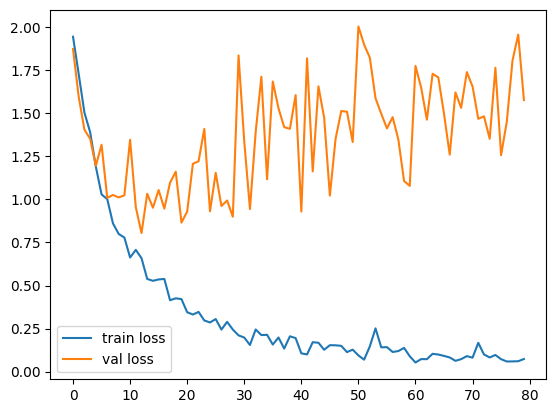

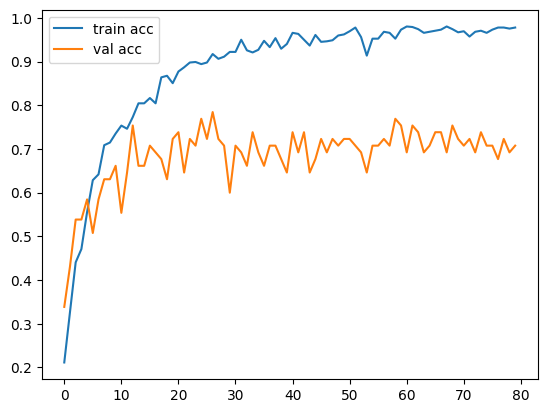

<Figure size 640x480 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [44]:
# Lưu a h5 file
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/AI/1_FINAL/model_inception.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/AI/1_FINAL/model_inception.h5')
model

# **CHẠY THỬ NGHIỆM**

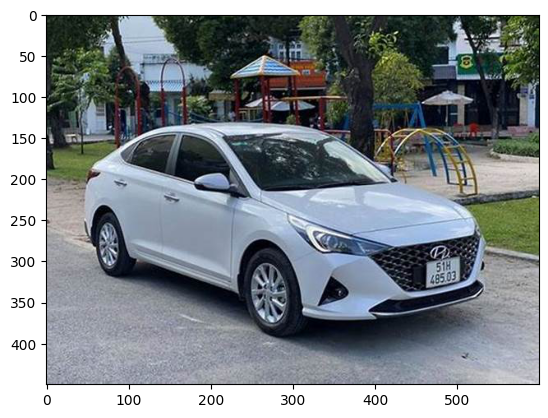

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical, load_img, img_to_array
img_data = load_img('/content/drive/MyDrive/AI/1_FINAL/Valid/Test1.jpg') #bạn Phi
img_data = img_to_array(img_data)
plt.imshow(img_data/255)


Chọn image : Test1
1/1 [==============================] - 0s 279ms/step
[[0 0 1 0 0 0]]
Car
Chọn image : Test3
1/1 [==============================] - 0s 40ms/step
[[0 1 0 0 0 0]]
Bus
Chọn image : Test4
1/1 [==============================] - 0s 35ms/step
[[0 0 0 0 0 1]]
Motor
Chọn image : Test5
1/1 [==============================] - 0s 55ms/step
[[1 0 0 0 0 0]]
Bicycle
Chọn image : Test6
1/1 [==============================] - 0s 35ms/step
[[0 0 0 1 0 0]]
Motor


KeyboardInterrupt: ignored

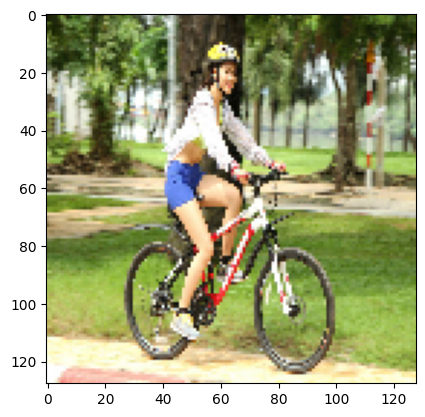

In [ ]:
import numpy as np
from keras.preprocessing import image
while 1 :
 ch = input('Chọn' ' image : ')
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/AI/1_FINAL/Valid/{}.jpg".format(ch),
                             target_size=(128,128)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     r = (model.predict(test_image) > 0.5).astype("int32")
     print(r)
     x=0
     c=0
     i=0
     while (i<6):
       if r[0][i]>=x:
         x=r[0][i]
         c=i
        
       i=i+1
       #Bicycle': 0, 'Bus': 1, 'Car': 2, 'Motor': 3
     if (x<=0 and c>=6) :
         c=6
     if c == 0:
       prediction = 'Bicycle'
     elif c == 1:
       prediction = 'Bus'
     elif c == 2:
       prediction = 'Car'
     elif c == 3:
       prediction = 'Motor'
     elif c == 4:
       prediction = 'Bicycle'
     elif c == 5:
       prediction = 'Motor'
     elif c == 6:
       prediction = 'Truck'

           
     print(prediction)
   except:
      print('Tên của hình ảnh không tồn tại '  )


In [ ]:
training_set.class_indices